## Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns',999)

## Load Dataset

In [3]:
path = r"./diamonds/data.csv"
dataset = pd.read_csv(path, header='infer')
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Missing Data
### Check for null values

In [4]:
m = dataset.isnull().sum()
m[m > 0]

cut      3
table    2
price    2
dtype: int64

### import libraries for handling missing data

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(dataset[['cut']])
dataset[['cut']] = imputer.transform(dataset[['cut']])
m = dataset.isnull().sum()
m[m > 0]

table    2
price    2
dtype: int64

### If categorical data then mode, with outliers then choose mode and If data without outliers then median

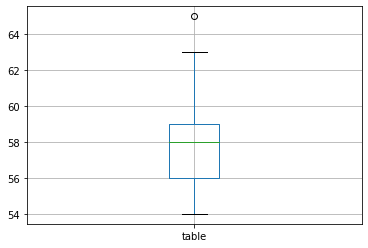

In [7]:
dataset[['table']].boxplot()

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(dataset[['table']])
dataset[['table']] = imputer.transform(dataset[['table']])
m = dataset.isnull().sum()
m[m > 0]

price    2
dtype: int64

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset[['price']])
dataset[['price']] = imputer.transform(dataset[['price']])
m = dataset.isnull().sum()
m[m > 0]

Series([], dtype: int64)

In [10]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [11]:
X = dataset[['carat','cut','color','clarity','depth','table','x','y','z']]
Y = dataset[['price']]

# Categorical data encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()
X[categorical_cols] = X[categorical_cols].apply(lambda each_column : label_encoder.fit_transform(each_column))
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,2,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,1,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,3,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,4,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,2,63.3,58.0,4.34,4.35,2.75


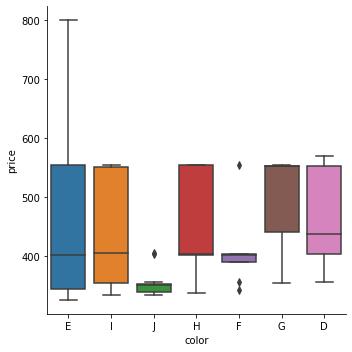

In [15]:
sns.catplot(x='color', y='price', kind='box', data=dataset)

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
ct = ColumnTransformer([('encoder', OneHotEncoder(drop='first',categories='auto'), ['cut','color','clarity'])], remainder='passthrough')
X = ct.fit_transform(X)

In [18]:
X = pd.DataFrame(data=X, columns=['Premium','Good','Very_Good','Fair','I','J','H','F','G','D','SI1','VS1','VS2','VVS2','VVS1','I1','carat','depth','table','x','y','z'])
X.head()

,Premium,Good,Very_Good,Fair,I,J,H,F,G,D,SI1,VS1,VS2,VVS2,VVS1,I1,carat,depth,table,x,y,z
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.21,59.8,61.0,3.89,3.84,2.31
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.23,56.9,65.0,4.05,4.07,2.31
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.29,62.4,58.0,4.20,4.23,2.63
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.31,63.3,58.0,4.34,4.35,2.75


### The rule of thumb seems to be:
#### If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
#### If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
#### If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

In [19]:
def find_skewness(dataFrame):
    'This function will return levels of skewness foreach column'
    from scipy.stats import skew 
    fairly_symmetrical, negatively_skewed, positively_skewed = ([] for i in range(3))
    for column in dataFrame.columns:
        skew_val = skew(dataFrame[[column]])
        if skew_val <= 0.5 and skew_val >= -0.5 :
            fairly_symmetrical.append((column, skew_val))
        elif skew_val > 0.5 :
            positively_skewed.append((column, skew_val))
        else :
            negatively_skewed.append((column, skew_val))
    return fairly_symmetrical, negatively_skewed, positively_skewed

In [20]:
sym_X, negative_X, positive_X = find_skewness(X[['carat','depth','table','x','y','z']])

In [21]:
sym_X

[('depth', array([-0.49849208])), ('table', array([0.4503914]))]

In [22]:
negative_X

[]

In [23]:
positive_X

[('carat', array([3.77709937])),
 ('x', array([2.33008619])),
 ('y', array([2.10813855])),
 ('z', array([1.78263278]))]

In [24]:
sym_Y, negative_Y, positive_Y = find_skewness(Y)

In [25]:
sym_Y

[]

In [26]:
negative_Y

[]

In [27]:
positive_Y

[('price', array([0.87859146]))]

In [28]:
def select_scaler(data, scaler_selection='std') :
    '''Give keywords for different scalers as follows :
    Standard - std
    MinMax - min_max
    Robust - robust
    '''
    columns_list=list(data.columns)
    scaler_options=['min_max', 'robust', 'sigmoid','log','log_plus_one','cbrt','std']
    try :
        if scaler_selection not in scaler_options :
            raise Exception
        else:
            if scaler_options[0] == scaler_selection :
                from sklearn.preprocessing import MinMaxScaler
                return pd.DataFrame(data = MinMaxScaler().fit_transform(data), columns = columns_list)
            elif scaler_options[1] == scaler_selection :
                from sklearn.preprocessing import RobustScaler
                return pd.DataFrame(data = RobustScaler(quantile_range=(25, 75)).fit_transform(data), columns = columns_list)
            elif scaler_options[2] == scaler_selection :
                from scipy.special import expit 
                return data.apply(lambda each_column : expit(each_column))
            elif scaler_options[3] == scaler_selection :
                from numpy import log 
                return data.apply(lambda each_column : log(each_column))
            elif scaler_options[4] == scaler_selection :
                from numpy import log 
                return data.apply(lambda each_column : log(each_column+1))
            elif scaler_options[5] == scaler_selection :
                from scipy.special import cbrt
                return data.apply(lambda each_column : cbrt(each_column))
            else:
                from sklearn.preprocessing import StandardScaler
                return pd.DataFrame(data = StandardScaler().fit_transform(data), columns = columns_list)
    except Exception :
        print ('Options ','min_max', 'robust','std','are only allowed')

In [29]:
f,n,p=find_skewness(select_scaler(X[['carat','depth','table','x','y','z']],scaler_selection='log_plus_one'))
p

[('carat', array([3.0872819])),
 ('x', array([1.83312246])),
 ('y', array([1.61340079])),
 ('z', array([1.33089238]))]

In [30]:
f,n,p=find_skewness(select_scaler(X[['carat','depth','table','x','y','z']],scaler_selection='sigmoid'))
p

[('carat', array([3.57208755])), ('z', array([0.55419006]))]

In [31]:
f,n,p=find_skewness(select_scaler(X[['carat','depth','table','x','y','z']],scaler_selection='cbrt'))
p

[('carat', array([2.22826925])),
 ('x', array([1.92024502])),
 ('y', array([1.70009397])),
 ('z', array([1.3713113]))]